In [4]:
import pandas as pd

# Load dataset
file_path = "dataset.csv"
df = pd.read_csv(file_path)
# Show first 5 rows
df.head()


,Disease,Symptom_0,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16
0,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AIDS,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AIDS,muscle_wasting,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AIDS,muscle_wasting,patches_in_throat,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AIDS,muscle_wasting,patches_in_throat,high_fever,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import numpy as np

# Replace NaN values with 'None'
df.fillna("None", inplace=True)

# Count unique diseases and total symptoms
unique_diseases = df["Disease"].nunique()
total_symptoms = df.iloc[:, 1:].replace("None", np.nan).count().sum()

print(f"Unique Diseases: {unique_diseases}")
print(f"Total Symptoms Recorded: {total_symptoms}")


Unique Diseases: 42
Total Symptoms Recorded: 2361


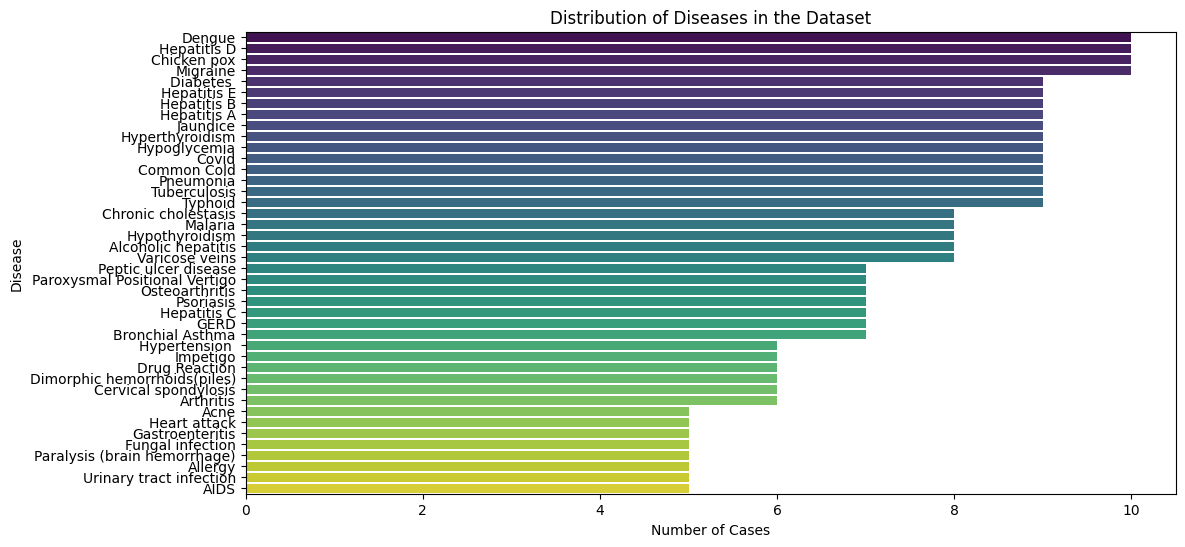

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count disease occurrences
disease_counts = df["Disease"].value_counts()

# Plot the distribution of diseases
plt.figure(figsize=(12, 6))
sns.barplot(y=disease_counts.index, x=disease_counts.values, hue=disease_counts.index, palette="viridis", legend=False)
plt.xlabel("Number of Cases")
plt.ylabel("Disease")
plt.title("Distribution of Diseases in the Dataset")
plt.show()


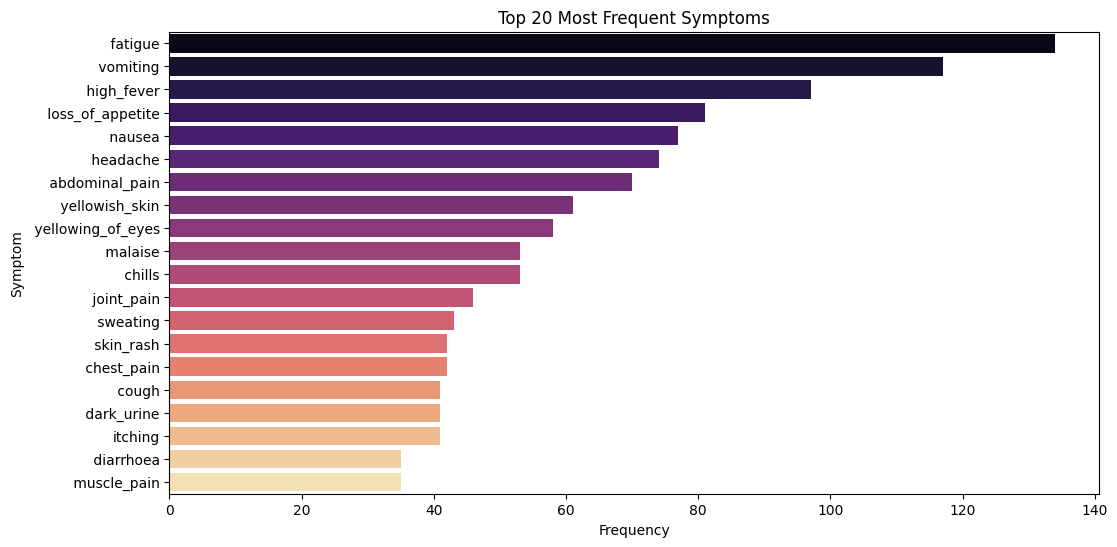

In [9]:
# Count occurrences of each symptom across all columns
symptom_columns = df.columns[1:]  # Exclude 'Disease' column
symptom_counts = df[symptom_columns].stack().value_counts()

# Remove 'None' from the count
symptom_counts = symptom_counts[symptom_counts.index != "None"]

# Plot top 20 symptoms
plt.figure(figsize=(12, 6))
sns.barplot(
    y=symptom_counts.index[:20], 
    x=symptom_counts.values[:20], 
    hue=symptom_counts.index[:20],  # Assign hue to avoid deprecation warning
    palette="magma", 
    legend=False  # Disable legend since labels are on the y-axis
)
plt.xlabel("Frequency")
plt.ylabel("Symptom")
plt.title("Top 20 Most Frequent Symptoms")
plt.show()

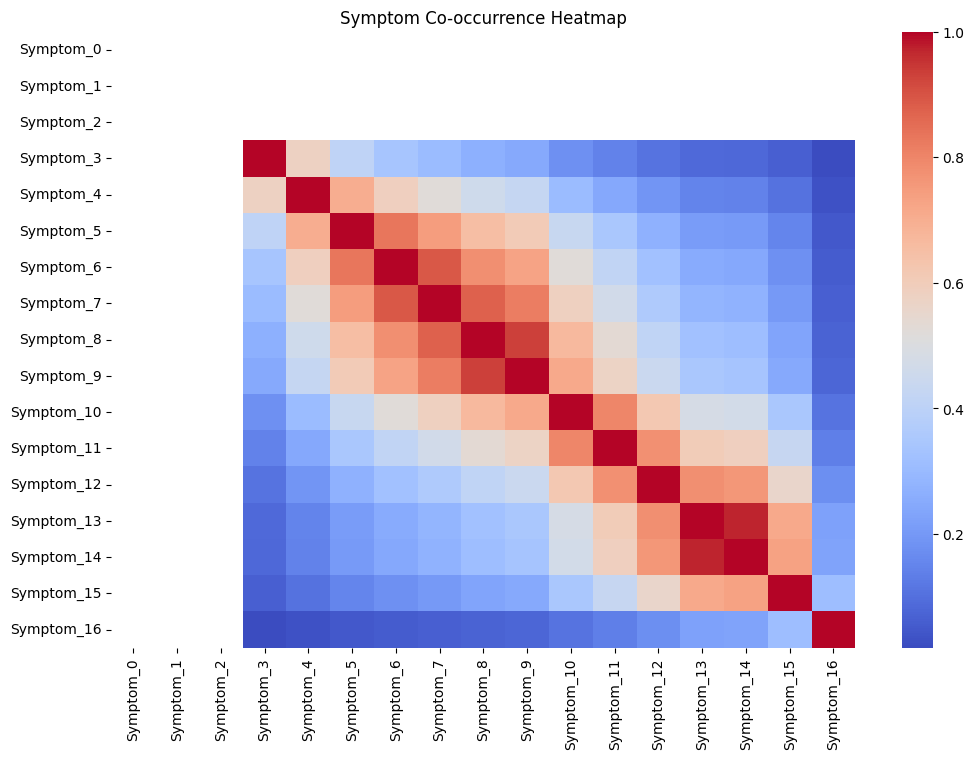

In [10]:
# Create a binary matrix (1 if symptom is present, 0 otherwise)
binary_df = df.copy()
for col in symptom_columns:
    binary_df[col] = binary_df[col].apply(lambda x: 0 if x == "None" else 1)

# Compute the correlation matrix
correlation_matrix = binary_df[symptom_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Symptom Co-occurrence Heatmap")
plt.show()


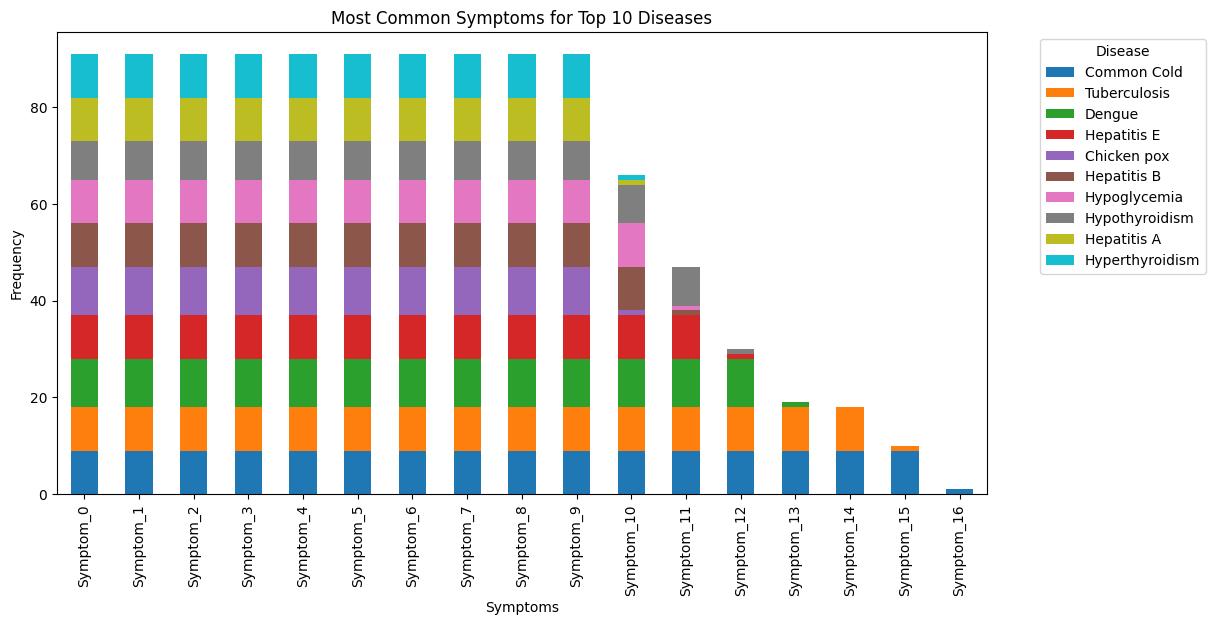

In [11]:
# Count symptoms per disease
disease_symptom_counts = binary_df.groupby("Disease").sum().T

# Select top 10 diseases with the most symptoms
top_diseases = disease_symptom_counts.sum(axis=0).nlargest(10).index
top_disease_symptoms = disease_symptom_counts[top_diseases]

# Plot stacked bar chart
top_disease_symptoms.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.xlabel("Symptoms")
plt.ylabel("Frequency")
plt.title("Most Common Symptoms for Top 10 Diseases")
plt.legend(title="Disease", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()
